In [97]:
# Beckham Carver
# 5/22/2024 <-- yes it's that late : ^)
# Warmup Excercise
# COSC 4557

In [1]:
# Sources:
# https://developers.redhat.com/articles/2021/05/21/introduction-machine-learning-jupyter-notebooks#using_a_jupyter_notebook_for_machine_learning
# Worked together with Michael Stoll, I read through the redhat article, and then referenced Mwolf's existing submission, 
# I recommended Mwolf's submission to Michael.

In [ ]:
# Pandas/numpy/matplotlib all felt similar to R, which I have worked in before for Design & Analysis Stats.
# I didn't (and do not yet) have these libraries functions commited to memory yet, but generally I know what I 
# want to do, and then have to search for the function that does it. Or in some cases just use regular python to
# do what close to what I need, i.e. (.apply(lambda x: x / 7)) when I wanted to squeeze the data so my Y-axis would 
# work better with the data set.

In [99]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('./rawdata/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


C:\Users\Beckham\AppData\Local\Temp\ipykernel_8284\3963941984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['total sulfur dioxide'] = df_hr['total sulfur dioxide'].apply(lambda x: x / 7)


<Axes: >

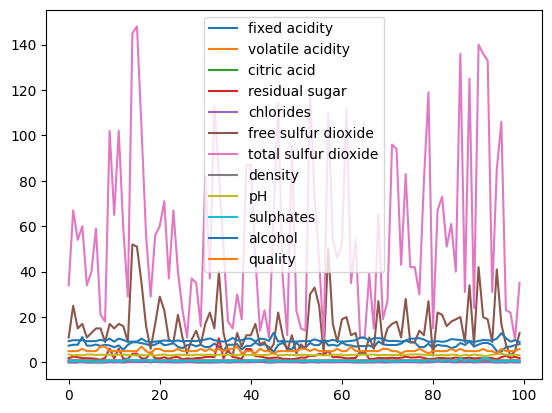

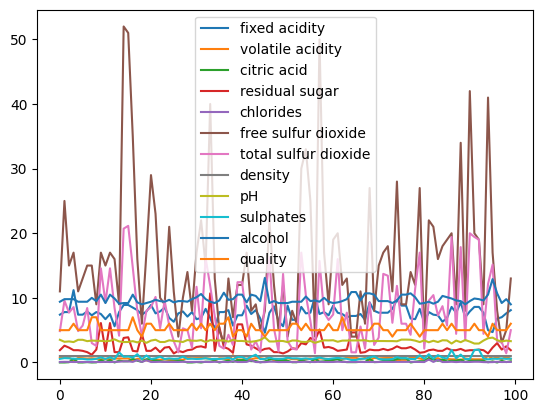

In [100]:
df_h = df.head(100)
df_h.plot()
df_hr = df_h
df_hr['total sulfur dioxide'] = df_hr['total sulfur dioxide'].apply(lambda x: x / 7)
df_hr.plot()

In [101]:
feature_x = df.drop(columns=["quality"])
target_y = df["quality"]

from sklearn.model_selection import train_test_split

# split training/test sets
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.33, random_state=237)
print("Training samples {}".format(X_train.shape[0]))
print("|- anomoly {:.2f}%\n".format(100*(y_train == 1).mean()))
print("Testing samples {}".format( X_test.shape[0]))
print("|- anomoly {:.2f}%".format(100*(y_test == 1).mean()))



Training samples 1071
|- anomoly 0.00%

Testing samples 528
|- anomoly 0.00%


In [102]:
from sklearn import linear_model
r = linear_model.LinearRegression()
r.fit(feature_x, target_y)
for key, value in dict(zip(feature_x.columns, r.coef_)).items(): print(f"{key.ljust(20)} : {value}")

fixed acidity        : 0.024990552671673768
volatile acidity     : -1.083590258693434
citric acid          : -0.1825639484107102
residual sugar       : 0.01633126976547501
chlorides            : -1.8742251580992042
free sulfur dioxide  : 0.004361333309096596
total sulfur dioxide : -0.003264579703068445
density              : -17.88116383249583
pH                   : -0.41365314382175716
sulphates            : 0.9163344127211331
alcohol              : 0.2761976992268874


In [103]:
y_predict = r.predict(X_test)
print("MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, y_predict)))
print("R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, y_predict)))
# random_state=237 gives identical MSE and R2, weird. Others do not.

MSE 0.38
R^2 0.38


In [ ]:
# With an MSE and R2 of 0.38, this regression model is ASS! Doesn't predict shit. 